## 7.1. 1D-CNN

In [1]:
import numpy as np
import random

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
seed = 123
np.random.seed(seed)
random.seed(seed)

tf.random.set_seed(seed)

In [3]:
# Minta adatok létrehozása és megjelenítése:
# adatok elkészítése
lp 	= np.linspace(-10*np.pi,10*np.pi,1000)
X 	= np.sin(lp)*3+np.cos(lp*2)+np.sin(np.pi/2+lp*4)*1.5+np.log(np.abs(lp))

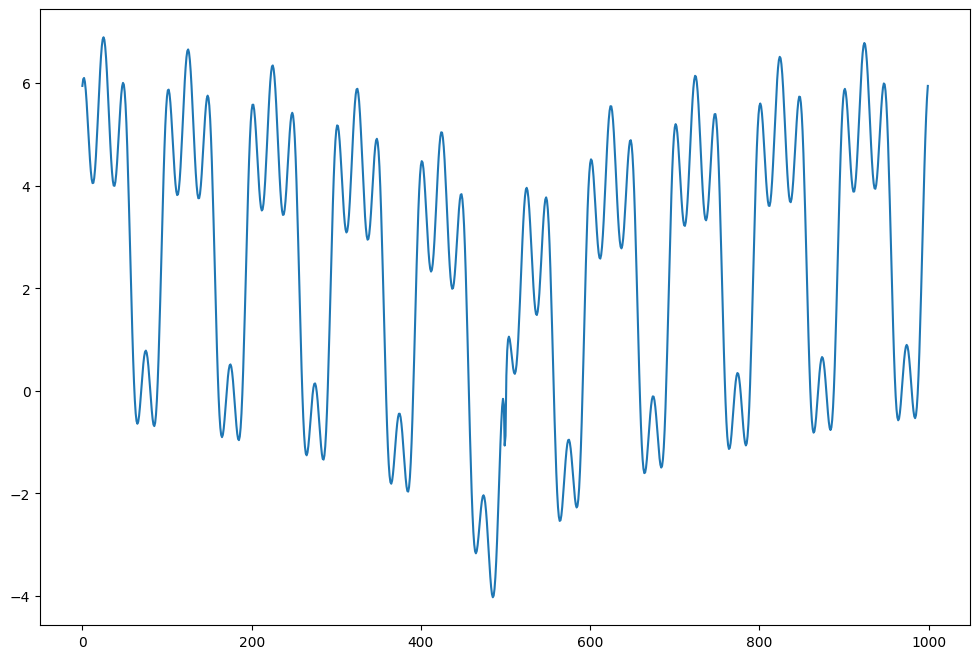

In [4]:
plt.figure(figsize=(12,8))
plt.plot(X)

In [5]:
# Az idősor adatokból az egy dimenziós konvolúció számára megfelelő formátum létrehozása.
def make_timeseries_instances(timeseries, window_size):
    timeseries = np.asarray(timeseries)
    assert 0 < window_size < timeseries.shape[0] , "Out of range 0 < {} < {} ".format(window_size,timeseries.shape[0])
    X = np.atleast_3d(np.array([timeseries[start:start + window_size] for start in range(0, timeseries.shape[0] - window_size)]))
    Y = timeseries[window_size:]
    return X, Y

In [6]:
# A hálózat létrehozását, adatok formázását és tanítását az alábbi függvény végzi, és visszatér a predikcióval és az eredeti értékekkel:
def evaluate_timeseries(model, timeseries, window_size, epochs, batch_size, valid_split=0.15, test_split=0.15):

    X, Y = make_timeseries_instances(timeseries, window_size)

    valid_size = int(nb_samples*(1-test_split-valid_split))
    test_size = int(nb_samples*(1-test_split))
    X_train, Y_train = X[:valid_size], Y[:valid_size]
    X_valid, Y_valid = X[valid_size:test_size], Y[valid_size:test_size]
    X_test, Y_test   = X[test_size:], Y[test_size:]

    model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, Y_valid), verbose=2)

    preds   = model.predict(X_test)

    return Y_test, preds

In [63]:
# Az egy dimenziós konvolúciós rétegek létrehozása.
def make_1d_convnet(window_size, filter_length, nb_input_series=1, nb_outputs=1, nb_filter=4):
    # Rétegek: Conv1D -> MaxPooling1D -> Conv1D -> MaxPooling1D -> Flatten -> Dense
    # filters, kernel_size: függvény argumentumai alapján (filter_length, nb_filter)
    # Aktivációs függvén: relu
    # Kimeneti réteg aktivációs függvény nélkül!

    model = Sequential()
    model.add(Conv1D(filters=nb_filter, kernel_size=filter_length, activation='relu', input_shape=(window_size, nb_input_series)))
    model.add(MaxPooling1D())
    model.add(Conv1D(filters=2*nb_filter, kernel_size=filter_length, activation='relu'))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(nb_outputs, activation='linear'))

    optimizer=Adam(lr=0.001)

    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

In [64]:
timeseries = np.atleast_2d(X)
if timeseries.shape[0] == 1:
    timeseries = timeseries.T       # 1D vektor -> 2D matrix
nb_samples, nb_series = timeseries.shape
print(nb_samples,',', nb_series)

1000 , 1


In [66]:
# Tanítás elindítása:
window_size = 32
filter_length = 6
nb_filter = 4

model = make_1d_convnet(window_size=window_size,
                        filter_length=filter_length,
                        nb_input_series=nb_series,
                        nb_outputs=nb_series,
                        nb_filter=nb_filter)
model.summary()

targets, preds = evaluate_timeseries(model, timeseries, window_size, epochs=26, batch_size=8, valid_split=0.15, test_split=0.15)

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_56 (Conv1D)          (None, 27, 4)             28        
                                                                 
 max_pooling1d_56 (MaxPooli  (None, 13, 4)             0         
 ng1D)                                                           
                                                                 
 conv1d_57 (Conv1D)          (None, 8, 8)              200       
                                                                 
 max_pooling1d_57 (MaxPooli  (None, 4, 8)              0         
 ng1D)                                                           
                                                                 
 flatten_28 (Flatten)        (None, 32)                0         
                                                                 
 dense_28 (Dense)            (None, 1)               

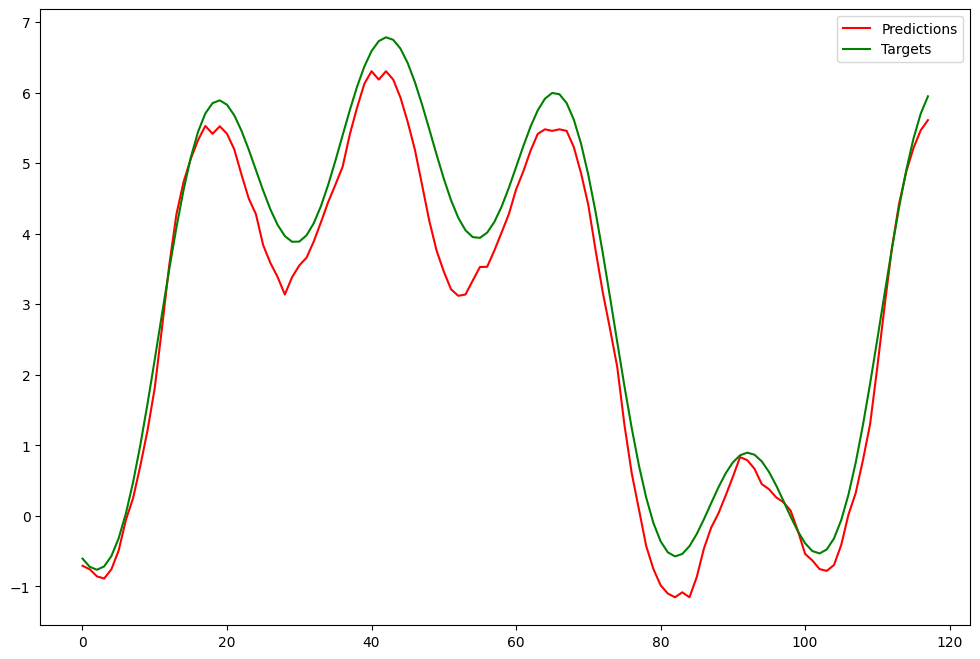

In [31]:
# Megjelenítjük a predikciót és az eredeti értékeket.
plt.figure(figsize=(12,8))
plt.plot(preds, color='r', label="Predictions")
plt.plot(targets, color='g', label="Targets")
plt.legend()

**Feladat**

A  tanító paraméterek vagy a haló architektúra módosításával érd el a legkissebb **val_mae** értéket.

Tanító paraméterek:


*   window_size
*   filter_length
*   nb_filter
*   optimizer
*   lr
*   momentum
* epochs
* batch_size
*   make_1d_convnet - model architektúra módosítása